<a href="https://colab.research.google.com/github/MUHAMMADALIAFZAL/Data_Science_Project_kidney_disease_Classification/blob/main/Project_Code_CKD_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [26]:
import math
import itertools
import numpy as np                         # Data Manipulation
import pandas as pd                        # Data Manipulation
import seaborn as sns                      # For Plotting
import matplotlib.pyplot as plt            # For Plotting
from sklearn.impute import SimpleImputer   # Predict Missing Values to Fill Nulls in the Dataset
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Loading the Dataset

In [2]:
# Reading the CSV File
dataframe = pd.read_csv('/content/drive/MyDrive/kidney_disease.csv')
dataframe = dataframe.drop('id', axis=1)
dataframe.head()  # Showing the DataFram

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Data Statistics

In [3]:
dataframe.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Datatypes

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

# Renaming the Columns

In [5]:
renamed_columns = {
    "age": "Age",
    "bp": "Blood_Pressure",
    "sg": "Specific_Gravity",
    "al": "Albumin",
    "su": "Sugar",
    "rbc": "Red_Blood_Cells",
    "pc": "Pus_Cells",
    "pcc": "Pus_Cell_Clumps",
    "ba": "Bacteria",
    "bgr": "Blood_Glucose_Random",
    "bu": "Blood_Urea",
    "sc": "Serum_Creatinine",
    "sod": "Sodium",
    "pot": "Potassium",
    "hemo": "Hemoglobin",
    "pcv": "Packed_Cell_Volume",
    "wc": "White_Blood_Cell_Count",
    "rc": "Red_Blood_Cell_Count",
    "htn": "Hypertension",
    "dm": "Diabetes_Mellitus",
    "cad": "Coronary_Artery_Disease",
    "appet": "Appetite",
    "pe": "Pedal_Edema",
    "ane": "Anemia",
    "classification": "Classification"
}

# Renaming the columns in the DataFrame
dataframe = dataframe.rename(columns=renamed_columns)

# Displaying the renamed DataFrame columns
dataframe.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


# NULL Value Count for Each Column

In [6]:
# Counting null values in each column
null_values_count = dataframe.isnull().sum()

# Displaying the count of null values
null_values_count

,0
Age,9
Blood_Pressure,12
Specific_Gravity,47
Albumin,46
Sugar,49
Red_Blood_Cells,152
Pus_Cells,65
Pus_Cell_Clumps,4
Bacteria,4
Blood_Glucose_Random,44


# Imputing Values in the Columns

In [7]:
# Separating numerical and categorical columns
numerical_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dataframe.select_dtypes(include=['object']).columns

# Imputation for numerical columns (filling with mean)
numerical_imputer = SimpleImputer(strategy='mean')
dataframe[numerical_columns] = numerical_imputer.fit_transform(dataframe[numerical_columns])

# Imputation for categorical columns (filling with most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
dataframe[categorical_columns] = categorical_imputer.fit_transform(dataframe[categorical_columns])

# Displaying the DataFrame after imputation
dataframe.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [8]:
# Counting null values in each column
null_values_count = dataframe.isnull().sum()

# Displaying the count of null values
null_values_count

,0
Age,0
Blood_Pressure,0
Specific_Gravity,0
Albumin,0
Sugar,0
Red_Blood_Cells,0
Pus_Cells,0
Pus_Cell_Clumps,0
Bacteria,0
Blood_Glucose_Random,0


# Data Cleaning

In [9]:
# Unique values in categorical columns only
unique_categorical_values = {col: dataframe[col].unique() for col in categorical_columns}

unique_categorical_values

{'Red_Blood_Cells': array(['normal', 'abnormal'], dtype=object),
 'Pus_Cells': array(['normal', 'abnormal'], dtype=object),
 'Pus_Cell_Clumps': array(['notpresent', 'present'], dtype=object),
 'Bacteria': array(['notpresent', 'present'], dtype=object),
 'Packed_Cell_Volume': array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '41',
        '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
        '14', '22', '18', '42', '17', '46', '23', '19', '25', '26', '15',
        '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51', '54'],
       dtype=object),
 'White_Blood_Cell_Count': array(['7800', '6000', '7500', '6700', '7300', '9800', '6900', '9600',
        '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
        '6200', '8300', '8400', '10300', '9100', '7900', '6400', '8600',
        '18900', '21600', '4300', '8500', '11300', '7200', '7700', '14600',
        '6300', '\t6200', '7100', '11800', '9400', '5500', '5800', '13200',
     

In [10]:
# Fixing abnormal values in the columns by normalizing them

# Replacing inconsistent values in each column
dataframe['Packed_Cell_Volume'] = dataframe['Packed_Cell_Volume'].replace(['\t43', '\t?'], ['43', None]).astype(float, errors='ignore')
dataframe['White_Blood_Cell_Count'] = dataframe['White_Blood_Cell_Count'].replace(['\t6200', '\t8400', '\t?'], [6200, 8400, None]).astype(float, errors='ignore')
dataframe['Red_Blood_Cell_Count'] = dataframe['Red_Blood_Cell_Count'].replace(['\t?'], [None]).astype(float, errors='ignore')
dataframe['Diabetes_Mellitus'] = dataframe['Diabetes_Mellitus'].replace([' yes', '\tyes', '\tno'], ['yes', 'yes', 'no'])
dataframe['Coronary_Artery_Disease'] = dataframe['Coronary_Artery_Disease'].replace(['\tno'], ['no'])
dataframe['Classification'] = dataframe['Classification'].replace(['ckd\t'], ['ckd'])

# Displaying the DataFrame to confirm corrections
dataframe.head()


,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,Packed_Cell_Volume,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


# EDA

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood_Pressure           400 non-null    float64
 2   Specific_Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red_Blood_Cells          400 non-null    object 
 6   Pus_Cells                400 non-null    object 
 7   Pus_Cell_Clumps          400 non-null    object 
 8   Bacteria                 400 non-null    object 
 9   Blood_Glucose_Random     400 non-null    float64
 10  Blood_Urea               400 non-null    float64
 11  Serum_Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

# A Graphical Visualization of the Dataset

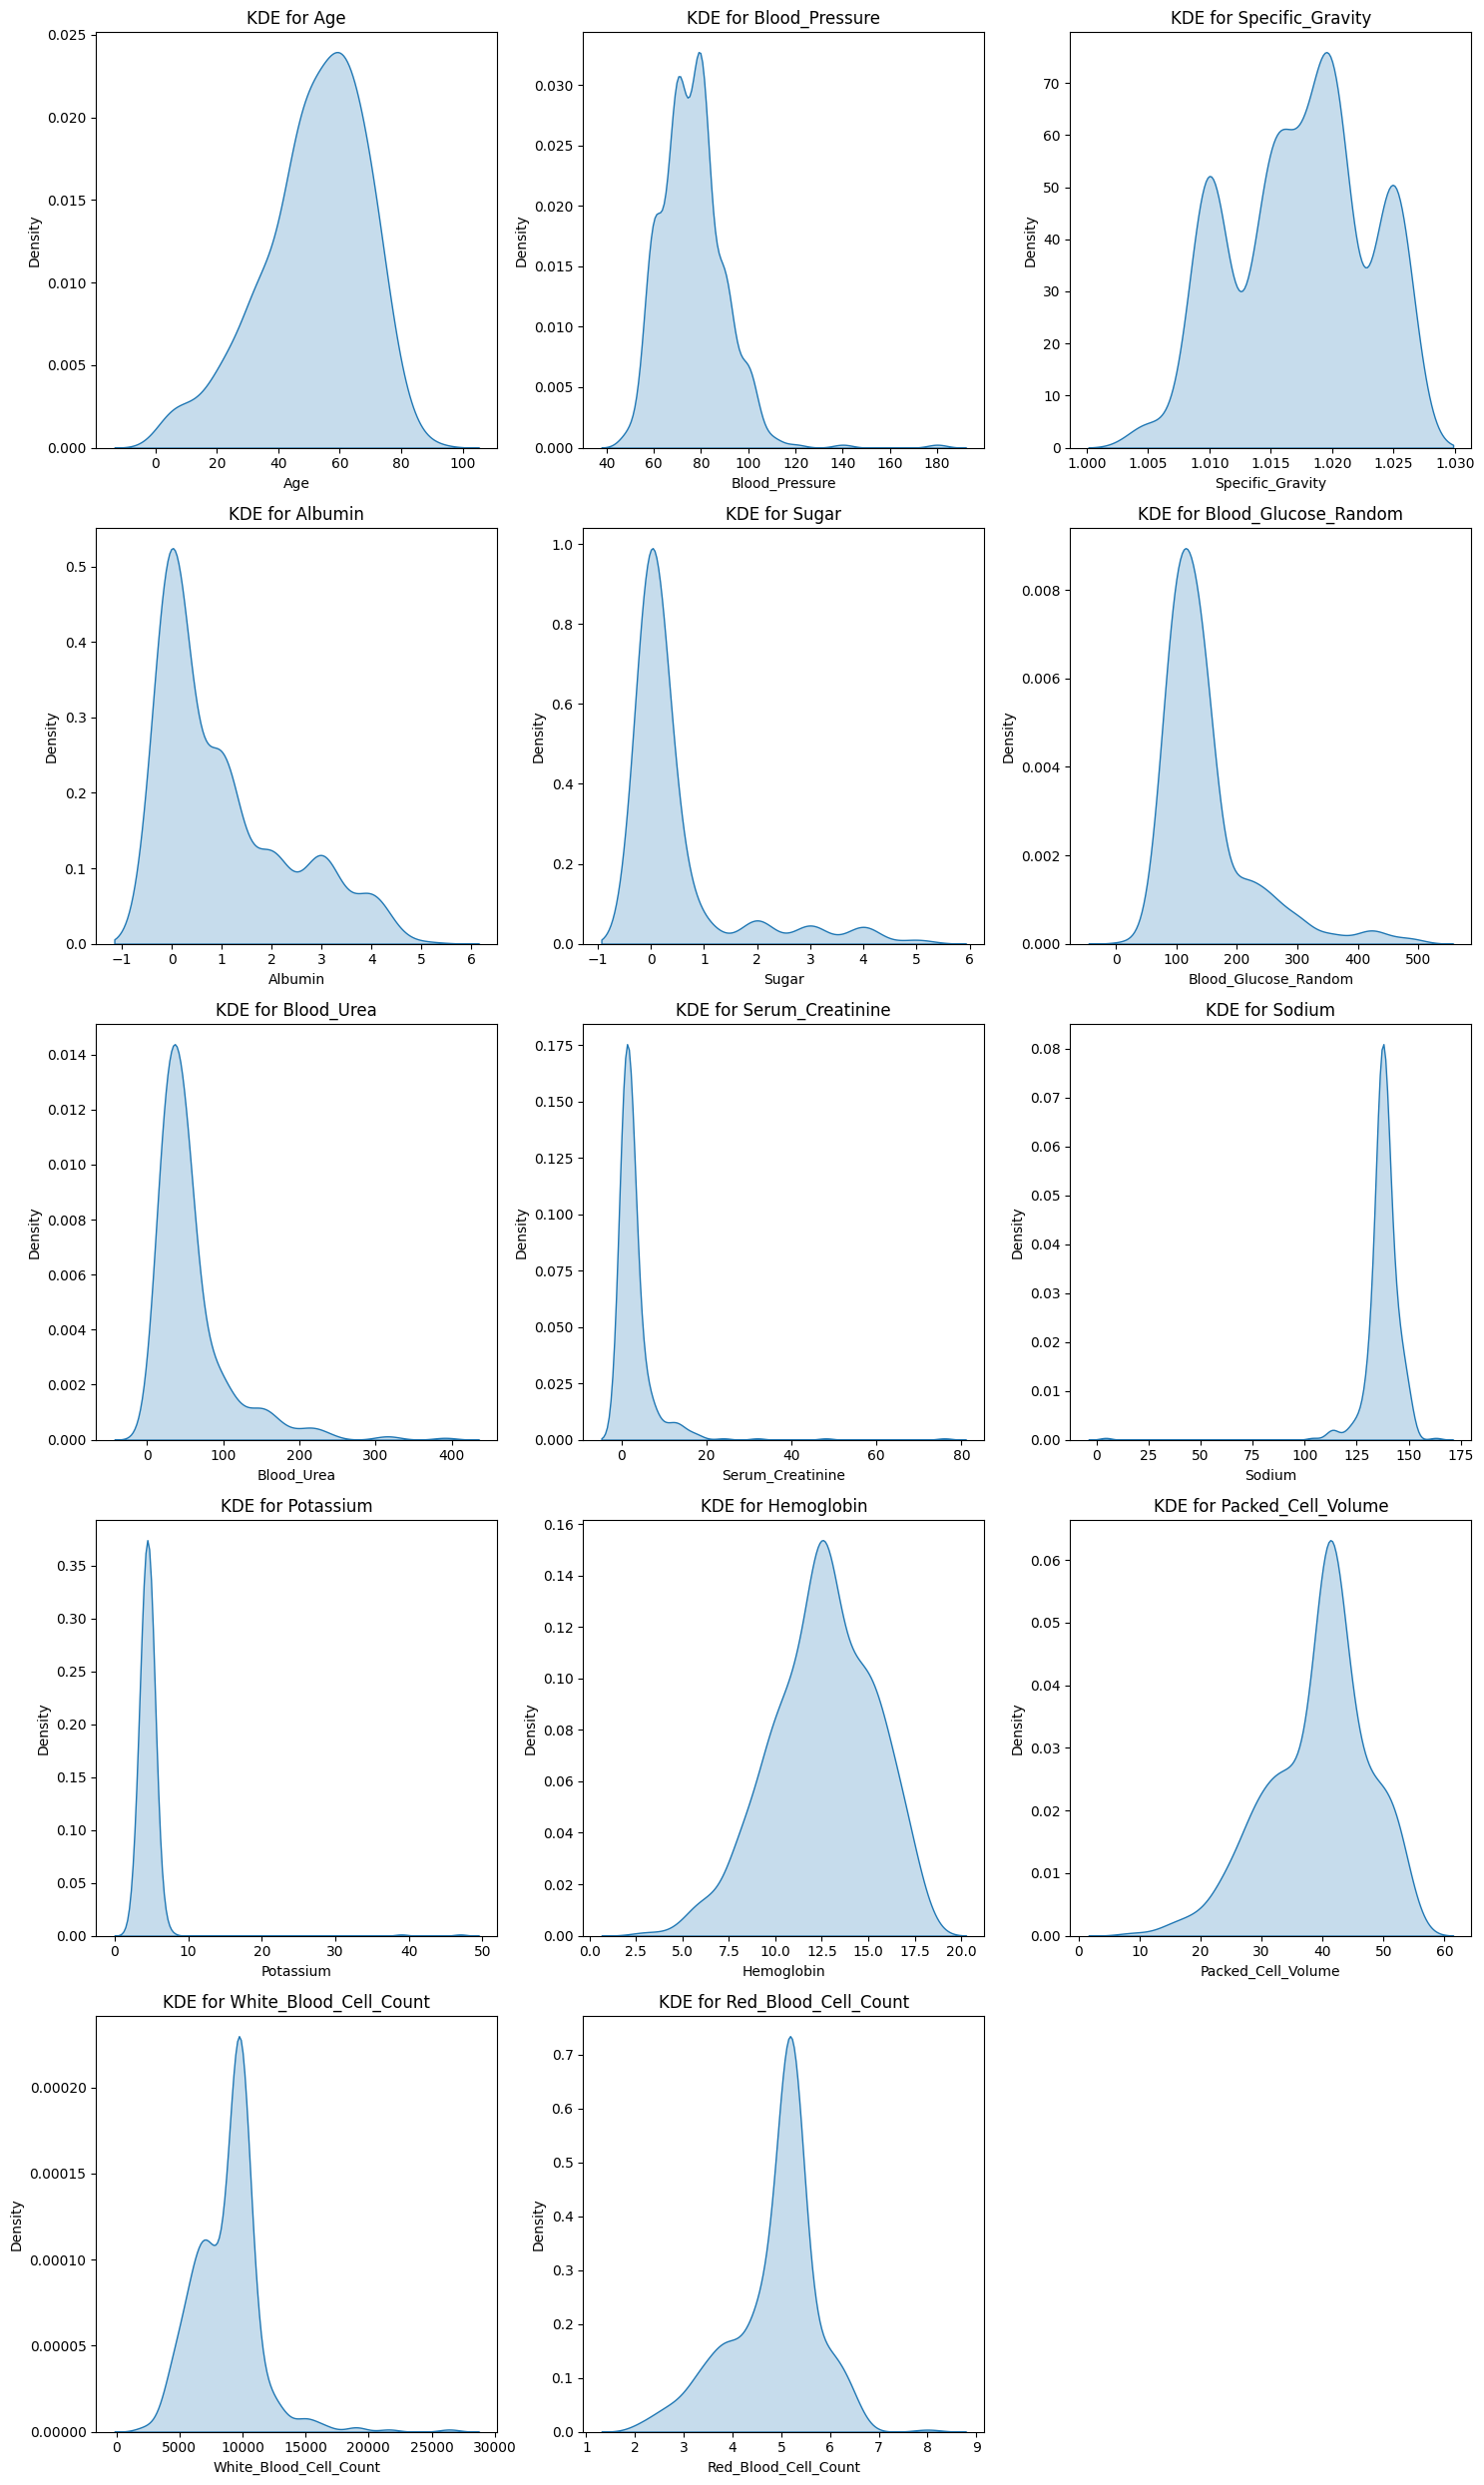

In [12]:
# Create subplots for numerical columns with KDE plots
numerical_columns = dataframe.select_dtypes(include=['float64']).columns

# Define the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the grid
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate rows based on columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.kdeplot(dataframe[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove any empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

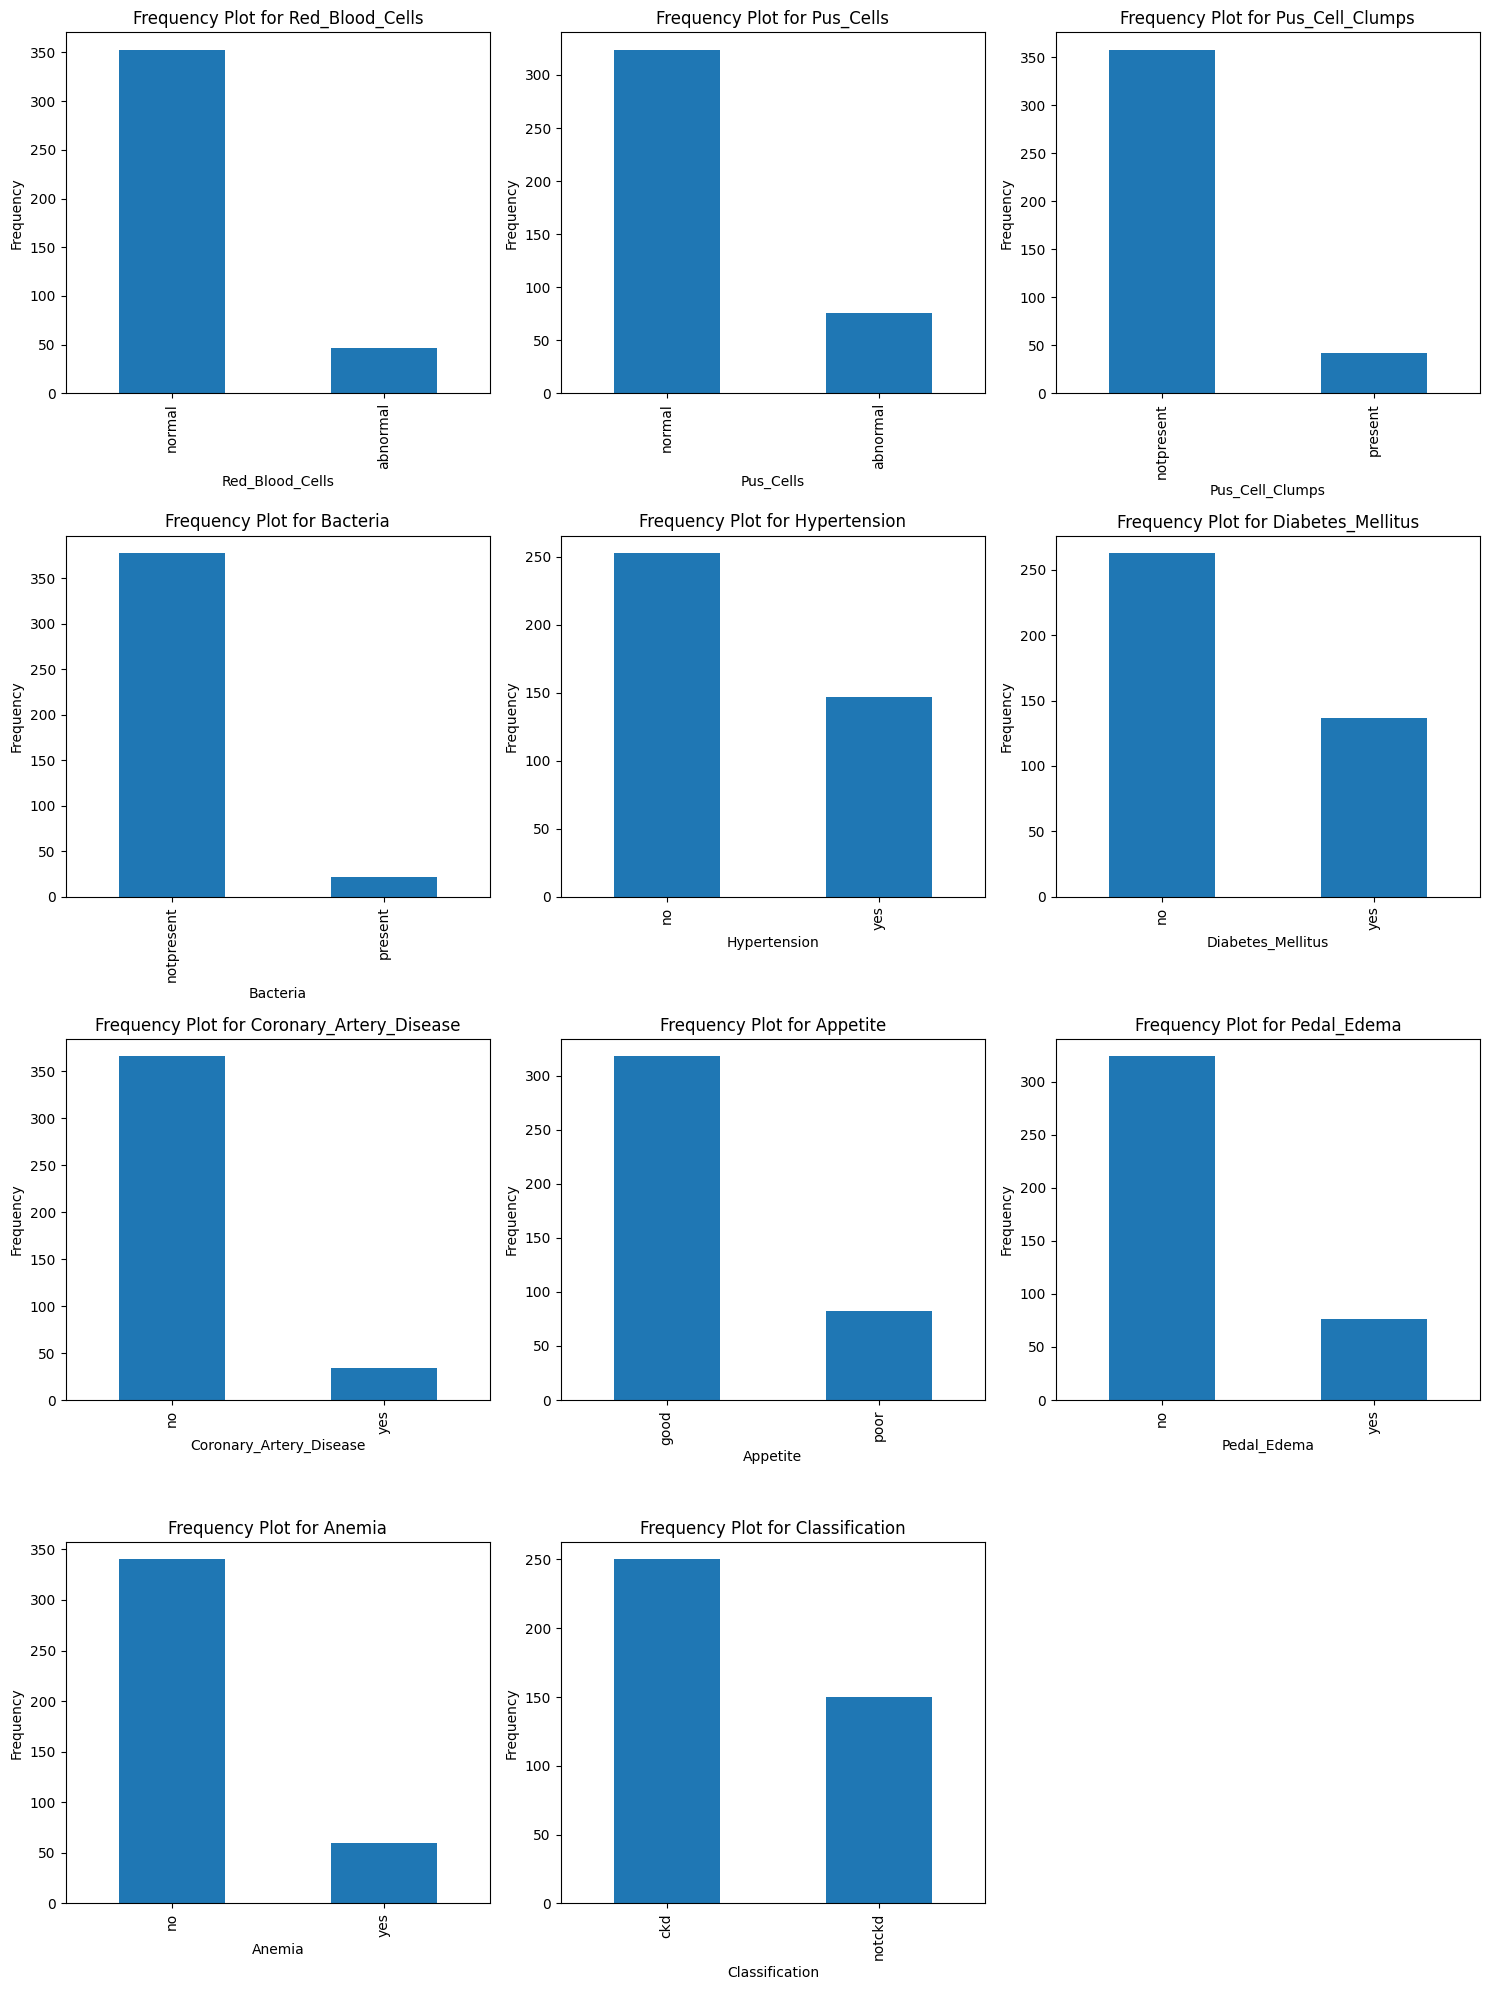

In [13]:
# Create frequency plots for categorical variables using subplots
categorical_columns = dataframe.select_dtypes(include=['object']).columns

# Define the number of rows and columns for the subplot grid
num_cols = 3  # Number of columns in the grid
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate rows based on columns

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Plot frequency plots for each categorical column
for i, col in enumerate(categorical_columns):
    dataframe[col].value_counts().plot(kind='bar', ax=axes[i], title=f'Frequency Plot for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Plot With Respect to Classification Column

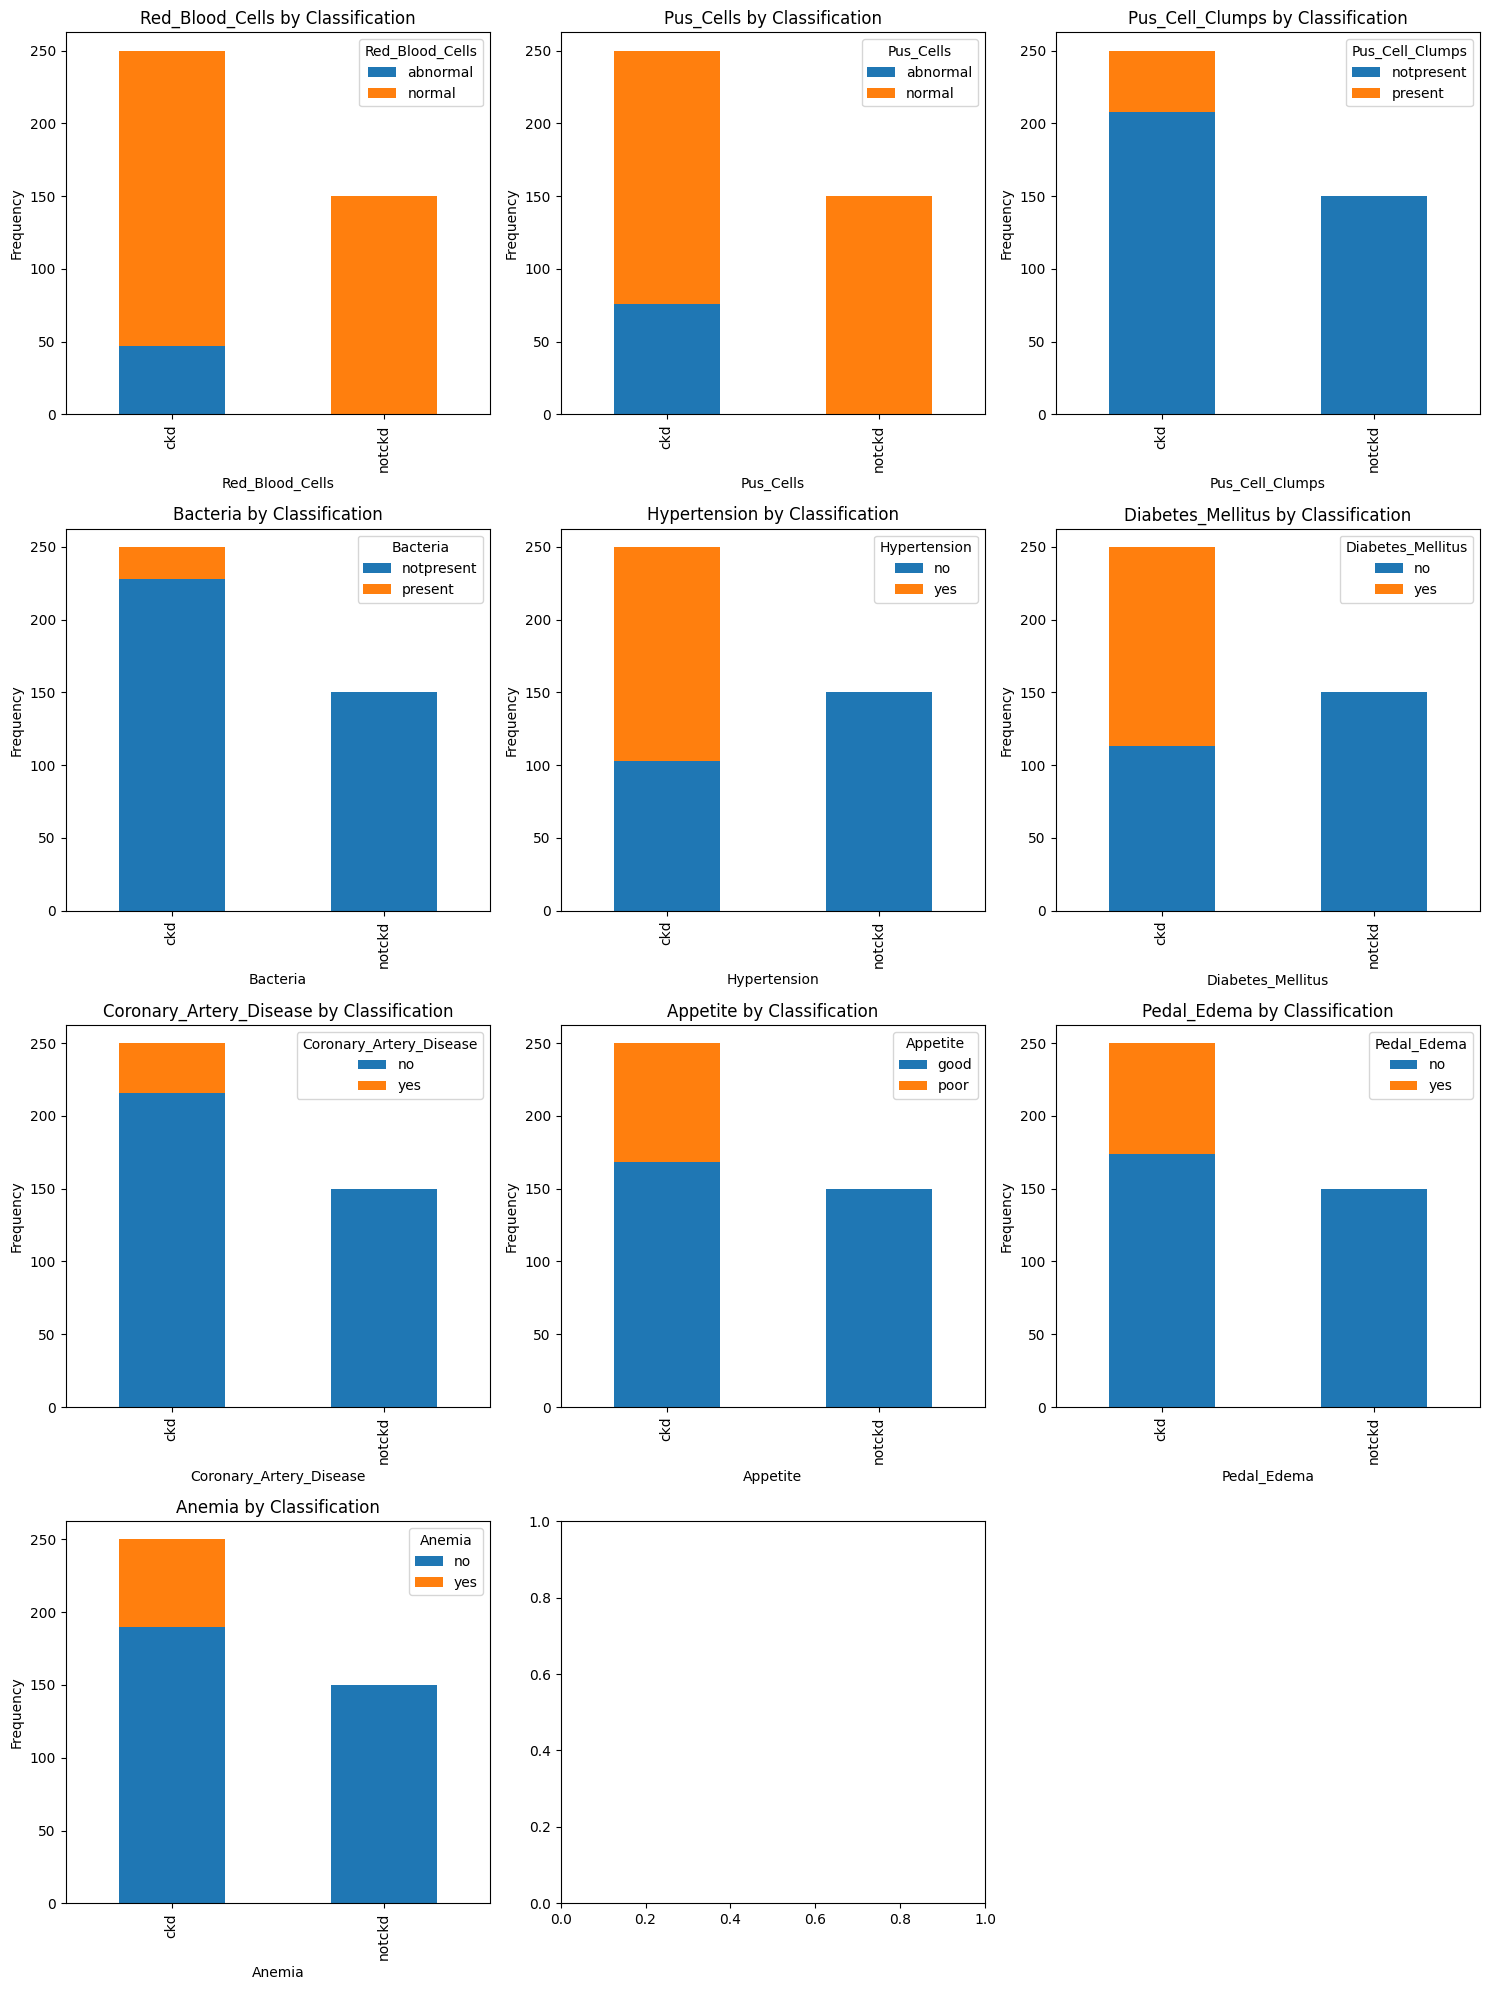

In [14]:
# Create frequency plots for categorical variables grouped by the 'Classification' column

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Plot grouped frequency plots for each categorical column
for i, col in enumerate(categorical_columns):
    if col != 'Classification':  # Skip the 'Classification' column itself
        dataframe.groupby(['Classification', col]).size().unstack().plot(
            kind='bar', stacked=True, ax=axes[i], title=f'{col} by Classification'
        )
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

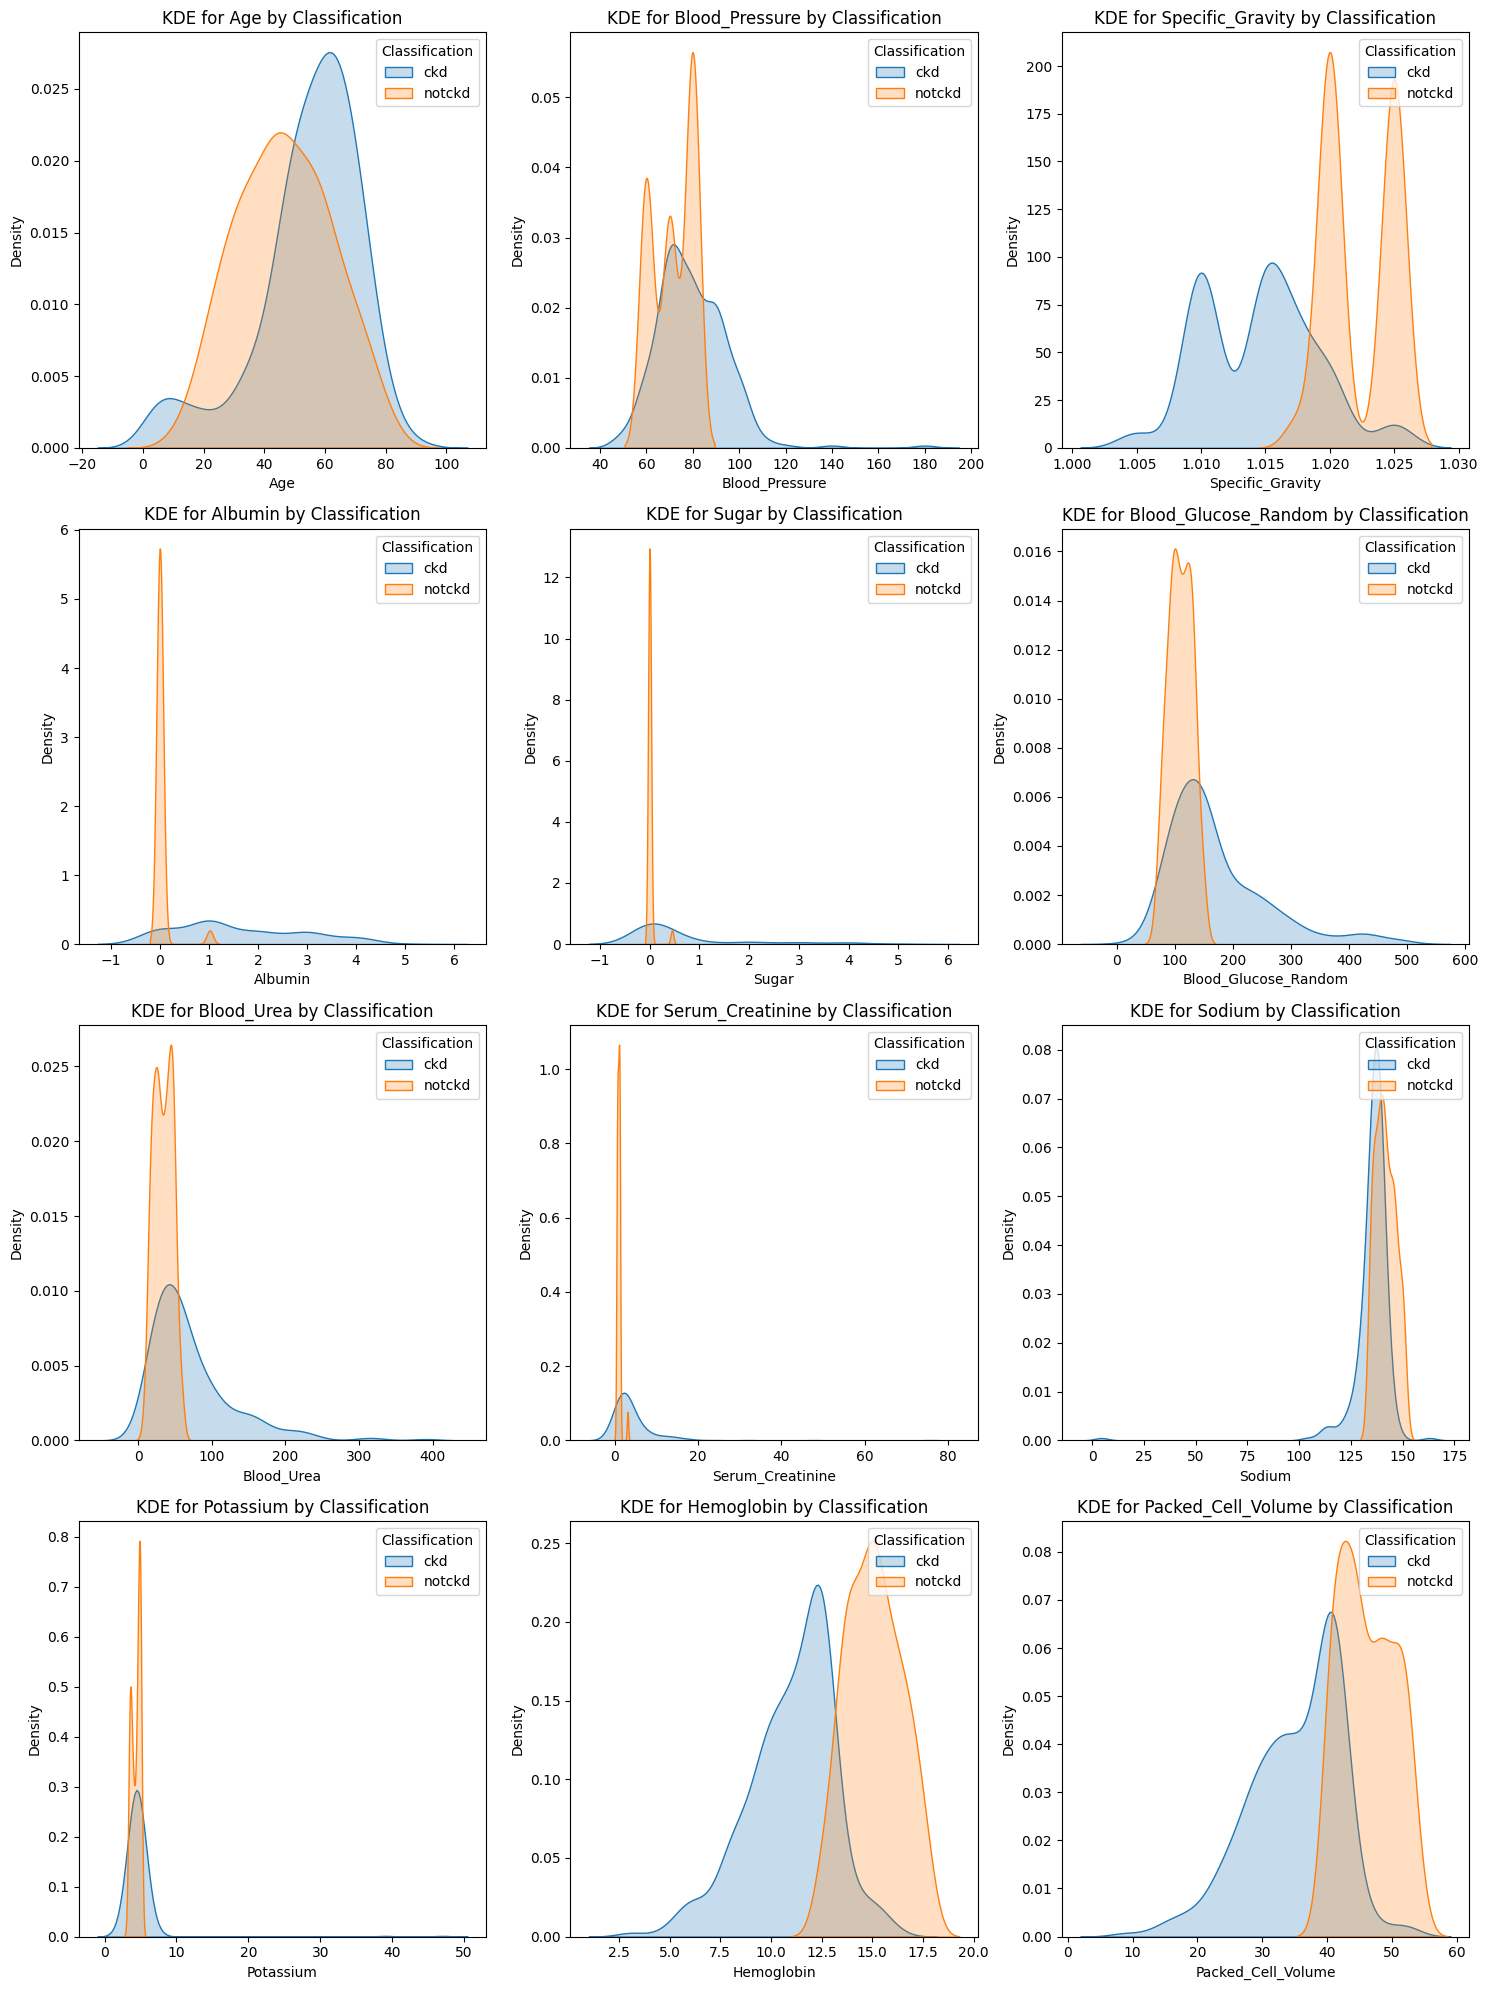

In [15]:
# Corrected KDE plots for numerical variables grouped by 'Classification'

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Plot KDE plots for each numerical column grouped by 'Classification'
for i, col in enumerate(numerical_columns):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        for classification in dataframe['Classification'].unique():
            sns.kdeplot(
                data=dataframe[dataframe['Classification'] == classification],
                x=col,
                ax=axes[i],
                fill=True,
                label=classification
            )
        axes[i].set_title(f'KDE for {col} by Classification')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Density')
        axes[i].legend(title='Classification')

# Remove any unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ReleationShip Among Features

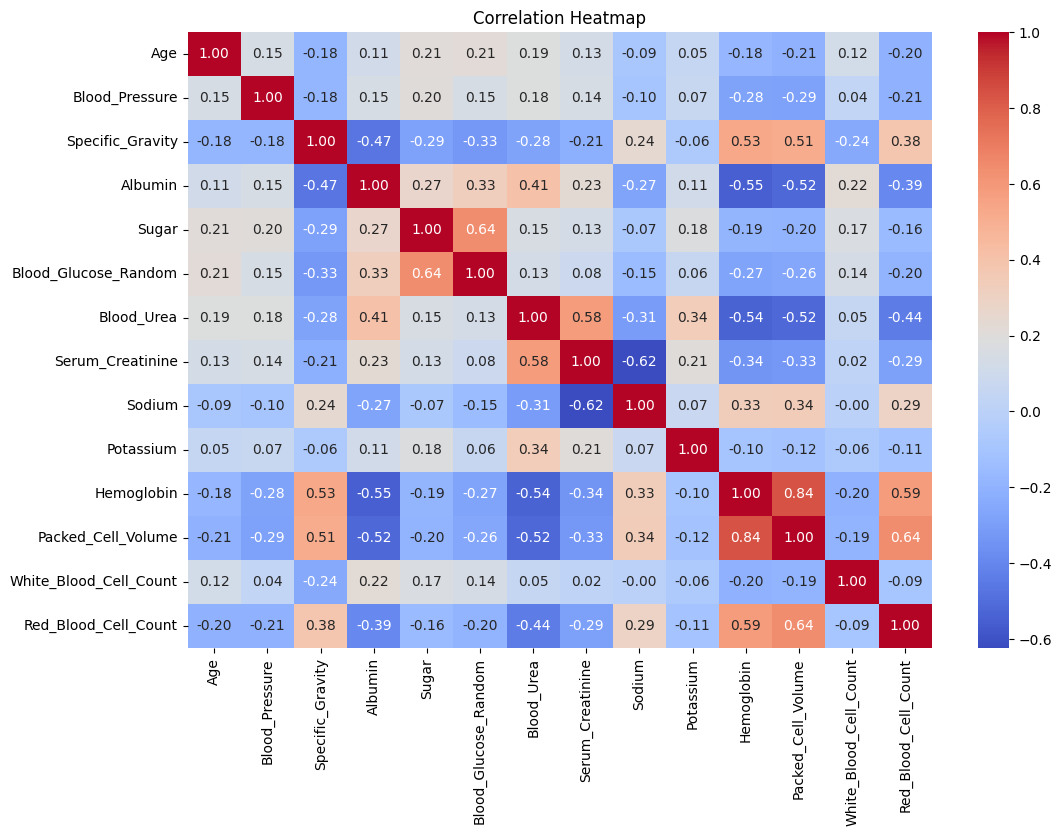

In [16]:
# Convert 'Classification' column to numeric
dataframe['Classification'] = dataframe['Classification'].map({'ckd': 1, 'notckd': 0})
numerical_columns = dataframe.select_dtypes(include=['float64']).columns
# Calculate the correlation matrix
correlation_matrix = dataframe[numerical_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Lable Ecoding For Categorical Columns in Dataset

In [17]:
# Perform label encoding for all categorical columns
categorical_columns = dataframe.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    dataframe[col] = label_encoders[col].fit_transform(dataframe[col])


# Seperating Target Variable and Features

In [18]:
columns_with_nulls = ['Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count']
df_cleaned = dataframe.dropna(subset=columns_with_nulls)

target_variable = 'Classification'

features = df_cleaned.drop(columns=[target_variable])
target = df_cleaned[target_variable]

# Display the shapes of features and target
features.shape, target.shape

((397, 24), (397,))

# Applying PCA on Features

In [20]:
# Standardize the features before applying PCA
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA to reduce to 5 components
pca = PCA(n_components=5)
pca_components = pca.fit_transform(features_scaled)

# Create a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(5)])

# Display the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_
pca_df.head()

,PC1,PC2,PC3,PC4,PC5
0,0.920093,0.647920,-0.876933,-0.315706,-0.151939
1,1.376911,-0.987028,1.281947,0.639943,-0.155613
2,-2.716006,2.541740,-1.110011,-0.122852,1.431879
3,-4.287482,-1.997822,2.124367,-0.969909,-1.286663
4,0.470738,-0.442236,0.292309,-0.156402,0.058970


# Seperating Dataset into Train and Test Set

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(pca_df, target, test_size=0.2, random_state=42, stratify=target)

# Train Machine Learning Models

In [22]:
# Train and evaluate RandomForestClassifier
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best_model = rf_grid.best_estimator_

print("RandomForest Best Parameters:", rf_grid.best_params_)
print("RandomForest Cross-validation Accuracy:", rf_grid.best_score_)
rf_y_pred = rf_best_model.predict(X_test)
print("\nRandomForest Classification Report:")
print(classification_report(y_test, rf_y_pred))

RandomForest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
RandomForest Cross-validation Accuracy: 0.9905753968253969

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



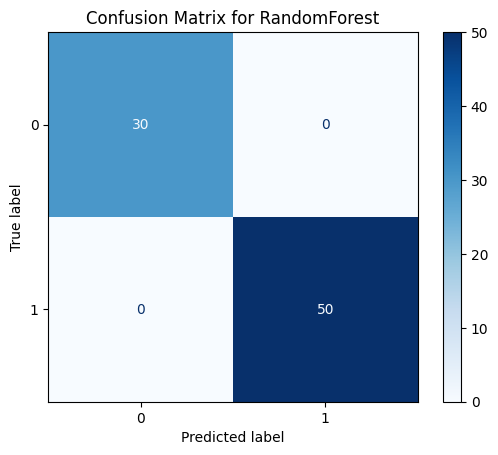

In [23]:
# Plot confusion matrix for RandomForest
ConfusionMatrixDisplay.from_estimator(rf_best_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for RandomForest")
plt.show()

In [24]:
# Train and evaluate SVC
svc_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}
svc_grid = GridSearchCV(SVC(probability=True, random_state=42), svc_params, cv=5, scoring="accuracy", n_jobs=-1)
svc_grid.fit(X_train, y_train)
svc_best_model = svc_grid.best_estimator_

print("\nSVC Best Parameters:", svc_grid.best_params_)
print("SVC Cross-validation Accuracy:", svc_grid.best_score_)
svc_y_pred = svc_best_model.predict(X_test)
print("\nSVC Classification Report:")
print(classification_report(y_test, svc_y_pred))


SVC Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC Cross-validation Accuracy: 0.9937003968253968

SVC Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



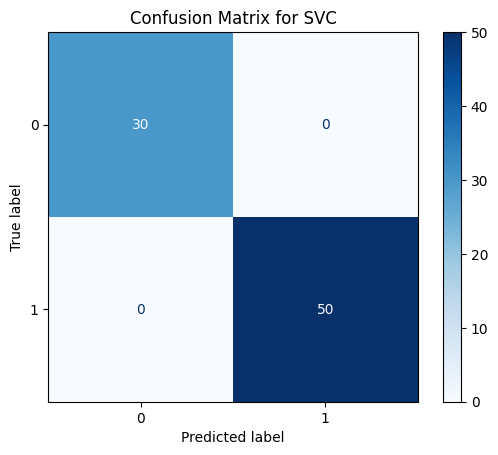

In [25]:
# Plot confusion matrix for SVC
ConfusionMatrixDisplay.from_estimator(svc_best_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix for SVC")
plt.show()

# Apply Deep Learning ANN Model

In [27]:
# Define the ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
# Train the model
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_proba = ann_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Classification report
print("\nANN Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.6469 - loss: 0.6498 - val_accuracy: 0.8594 - val_loss: 0.4897
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9042 - loss: 0.4698 - val_accuracy: 0.8906 - val_loss: 0.3696
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9115 - loss: 0.3710 - val_accuracy: 0.8906 - val_loss: 0.2846
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9364 - loss: 0.2789 - val_accuracy: 0.8906 - val_loss: 0.2316
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9178 - loss: 0.2208 - val_accuracy: 0.8906 - val_loss: 0.1922
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9359 - loss: 0.1965 - val_accuracy: 0.9219 - val_loss: 0.1566
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9456 - loss: 0.1565 - val_accuracy: 0.9219 - val_loss: 0.1313
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9493 - loss: 0.1320 - val_accuracy: 0.9531 - val_loss: 0.1085


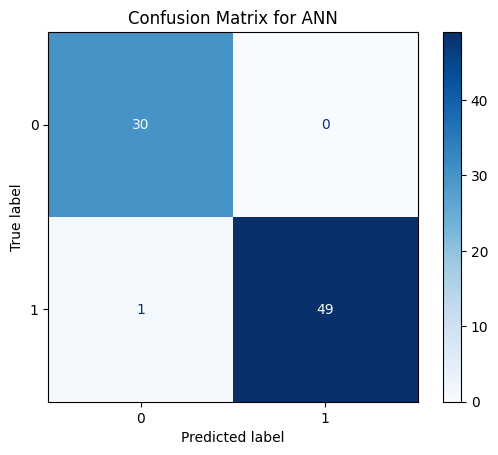

In [30]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix for ANN")
plt.show()